<a href="https://colab.research.google.com/github/Alim20022004/FederatedLearning/blob/main/PRE_TRAINED_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from medmnist import PathMNIST
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights,mobilenet_v3_small,MobileNet_V3_Small_Weights,resnet18,ResNet18_Weights,efficientnet_b0, EfficientNet_B0_Weights,efficientnet_b1, EfficientNet_B1_Weights
import torchvision
print(torchvision.__version__)



0.21.0+cu124


In [ ]:
# تحميل البيانات مع تحسين Augmentation
def load_data(data_flag='pathmnist', batch_size=128):

    # Augmentation only for training
    train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet stats
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
      ])

    test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
      ])


    # Load datasets using the transforms defined above

    train_dataset = PathMNIST(split='train', transform=train_transform, download=True)
    val_dataset = PathMNIST(split='val', transform=test_transform, download=True)
    test_dataset = PathMNIST(split='test', transform=test_transform, download=True)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
    return train_loader, val_loader, test_loader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes=9


### **Resnet-18**

In [ ]:
'''modelRes = resnet18(weights=ResNet18_Weights.DEFAULT)

# weights = ResNet18_Weights.DEFAULT
# model = resnet18(weights=weights)
modelRes.fc = nn.Linear(modelRes.fc.in_features, num_classes)
modelRes = modelRes.to(device)'''

'modelRes = resnet18(weights=ResNet18_Weights.DEFAULT)\n\n# weights = ResNet18_Weights.DEFAULT\n# model = resnet18(weights=weights)\nmodelRes.fc = nn.Linear(modelRes.fc.in_features, num_classes)\nmodelRes = modelRes.to(device)'

### **MobileNET_V2**

In [ ]:
'''modelmobile= mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)

# Modify the classifier to output num_classes (9 in our case)
# MobileNetV2's classifier is a sequential container.
modelmobile.classifier[1] = nn.Linear(modelmobile.last_channel, num_classes)

modelmobile = modelmobile.to(device)'''


"modelmobile= mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)\n\n# Modify the classifier to output num_classes (9 in our case)\n# MobileNetV2's classifier is a sequential container.\nmodelmobile.classifier[1] = nn.Linear(modelmobile.last_channel, num_classes)\n\nmodelmobile = modelmobile.to(device)"

### **MobileNet_V3**

In [ ]:
modelnetV3 = mobilenet_v3_small(weights=MobileNet_V3_Small_Weights.DEFAULT)
modelnetV3.classifier[3] = nn.Linear(modelnetV3.classifier[3].in_features, num_classes)
modelnetV3 = modelnetV3.to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 218MB/s]


# **Efficientnet_b0**

In [ ]:
modeleff = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
modeleff.classifier[1] = nn.Linear(modeleff.classifier[1].in_features, num_classes)
modeleff=modeleff.to(device)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 218MB/s]


In [ ]:
# تحسين وظيفة التدريب
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    correct, total, running_loss = 0, 0, 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.squeeze().to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    return train_loss, train_acc

# تحسين وظيفة التحقق
def validate(model, val_loader, criterion, device):
    model.eval()
    correct, total, val_loss = 0, 0, 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.squeeze().to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct / total
    return val_loss, val_acc

In [ ]:
# تدريب النموذج مع Scheduler
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        scheduler.step()  # تحديث معامل التعلم

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    return train_losses, train_accuracies, val_losses, val_accuracies

In [ ]:
# تقييم النموذج
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total, correct, test_loss = 0, 0, 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.squeeze().to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())  # Fixed line
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()

    test_loss = test_loss / len(test_loader)
    test_acc = 100 * correct / total
    return test_loss, test_acc,np.array(all_preds), np.array(all_labels)


In [ ]:
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    """Plot training/validation curves with customized markers and interactive tooltips."""
    plt.figure(figsize=(12, 4))

    # 📌 رسم منحنى الخسارة (Loss)
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Train Loss', marker="o", markersize=5, color="b")
    sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Val Loss', marker="s", markersize=5, color="r")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 📌 رسم منحنى الدقة (Accuracy)
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Train Acc', marker="o", markersize=5, color="g")
    sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Val Acc', marker="s", markersize=5, color="m")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)


    # 📌 تحسين الشكل وعرضه
    plt.tight_layout()
    plt.show()

100%|██████████| 206M/206M [02:01<00:00, 1.69MB/s]


Epoch 1/10: Train Loss: 0.2523, Train Acc: 91.52% | Val Loss: 0.1978, Val Acc: 93.24%
Epoch 2/10: Train Loss: 0.1379, Train Acc: 95.48% | Val Loss: 0.1049, Val Acc: 96.66%
Epoch 3/10: Train Loss: 0.1102, Train Acc: 96.40% | Val Loss: 0.0797, Val Acc: 97.35%
Epoch 4/10: Train Loss: 0.0864, Train Acc: 97.11% | Val Loss: 0.0721, Val Acc: 97.79%
Epoch 5/10: Train Loss: 0.0668, Train Acc: 97.75% | Val Loss: 0.0456, Val Acc: 98.59%
Epoch 6/10: Train Loss: 0.0500, Train Acc: 98.26% | Val Loss: 0.0381, Val Acc: 98.82%
Epoch 7/10: Train Loss: 0.0351, Train Acc: 98.86% | Val Loss: 0.0285, Val Acc: 99.15%
Epoch 8/10: Train Loss: 0.0232, Train Acc: 99.22% | Val Loss: 0.0237, Val Acc: 99.29%
Epoch 9/10: Train Loss: 0.0163, Train Acc: 99.43% | Val Loss: 0.0192, Val Acc: 99.43%
Epoch 10/10: Train Loss: 0.0114, Train Acc: 99.63% | Val Loss: 0.0186, Val Acc: 99.45%


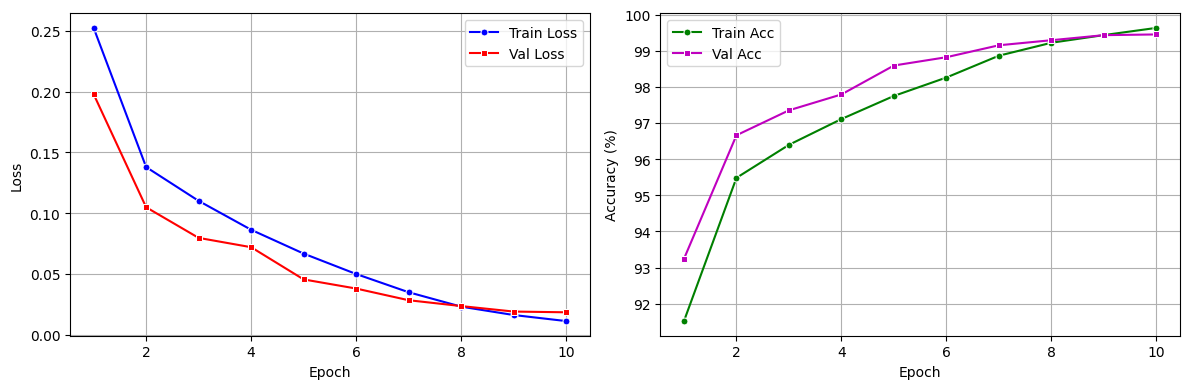

In [ ]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
num_epochs = 10
train_loader, val_loader, test_loader = load_data(batch_size=batch_size)



criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(modeleff.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
train_losses, train_acc, val_losses, val_acc = train_model(
   modeleff, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs
    )

plot_metrics(train_losses, val_losses, train_acc, val_acc)



In [ ]:
test_loss, test_acc,test_preds, test_labels = evaluate_model(modeleff , test_loader, criterion, device)
print(f"\nTest Results: Loss = {test_loss:.4f}, Accuracy = {test_acc:.2f}%")


Test Results: Loss = 0.1962, Accuracy = 95.64%



Classification Report:
                                      precision    recall  f1-score   support

                             adipose     0.9962    0.9798    0.9879      1338
                          background     0.9918    1.0000    0.9959       847
                              debris     0.9261    0.9617    0.9436       339
                         lymphocytes     0.9662    0.9921    0.9790       634
                               mucus     0.9922    0.9816    0.9869      1035
                       smooth muscle     0.8263    0.9324    0.8762       592
                 normal colon mucosa     0.9538    0.9744    0.9640       741
            cancer-associated stroma     0.8593    0.6675    0.7513       421
colorectal adenocarcinoma epithelium     0.9610    0.9594    0.9602      1233

                            accuracy                         0.9564      7180
                           macro avg     0.9414    0.9388    0.9383      7180
                        weighted avg  

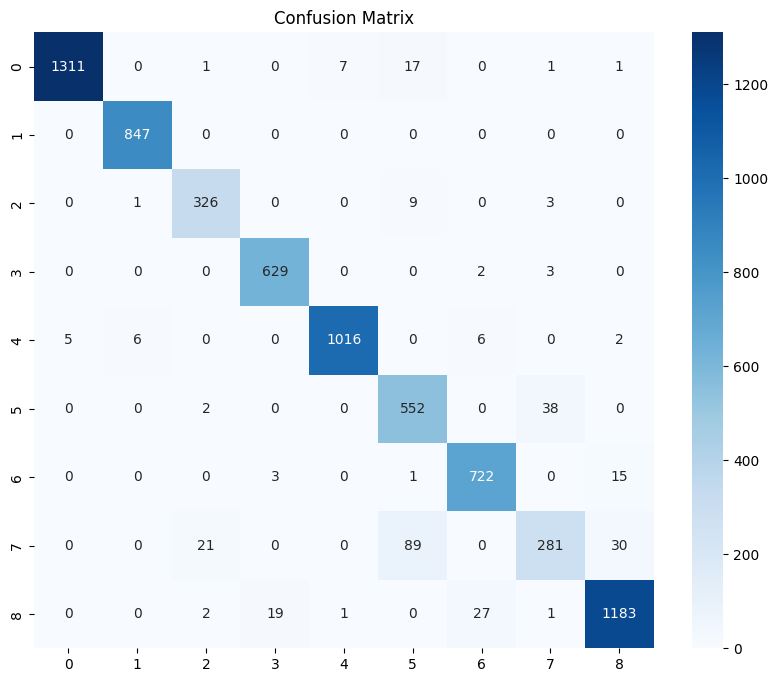

In [ ]:
# Confusion Matrix & Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=PathMNIST(split='train').info['label'].values(),digits=4))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(test_labels, test_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import datetime

def save_report(train_losses, val_losses, train_accuracies, val_accuracies,
                test_loss, test_acc, test_labels, test_preds,
                target_names, filename=None):
    """
    Save the experiment results in a multi-page PDF.

    Parameters:
      - train_losses, val_losses: lists of training and validation losses per epoch.
      - train_accuracies, val_accuracies: lists of accuracies per epoch.
      - test_loss: final test loss (float).
      - test_acc: final test accuracy (float).
      - test_labels: true labels for the test set.
      - test_preds: predicted labels for the test set.
      - target_names: list of label names for the classification report.
      - filename: optional file name; if None, a name with timestamp is created.
    """
    # If no filename is provided, generate one with a timestamp.
    if filename is None:
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"experiment_report_{timestamp}.pdf"

    # Generate the classification report (as a string) and the confusion matrix array.
    class_report = classification_report(test_labels, test_preds, target_names=target_names,digits=4)
    conf_matrix = confusion_matrix(test_labels, test_preds)

    with PdfPages(filename) as pdf:
        # -----------------------------
        # Page 1: Loss and Accuracy Curves
        # -----------------------------
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Plot Loss Curves on the left axis
        sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Train Loss',
                     marker="o", markersize=5, color="b", ax=axes[0])
        sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Val Loss',
                     marker="s", markersize=5, color="r", ax=axes[0])
        axes[0].set_title("Training & Validation Loss")
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Loss")
        axes[0].legend()
        axes[0].grid(True)

        # Plot Accuracy Curves on the right axis
        sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Train Acc',
                     marker="o", markersize=5, color="b", ax=axes[1])
        sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Val Acc',
                     marker="s", markersize=5, color="r", ax=axes[1])
        axes[1].set_title("Training & Validation Accuracy")
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Accuracy %")
        axes[1].legend()
        axes[1].grid(True)
        plt.tight_layout()
        fig.suptitle("Training & Validation Metrics", fontsize=16)
        pdf.savefig(fig)
        plt.close(fig)


        # -----------------------------
        # Combined Page: Test Results & Classification Report
        # -----------------------------
        import pandas as pd

        # Generate the classification report as a dictionary and convert it into a DataFrame
        report_dict = classification_report(test_labels, test_preds, target_names=target_names, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose()
        report_df = report_df.round(4)  # Round numerical values for clarity

        # Create a figure with two rows: one for test results, one for the classification table
        fig, axes = plt.subplots(2, 1, figsize=(10, 12))

        # Top subplot: Display Test Results
        results_text = (f"Test Loss: {test_loss:.4f}\n"
                f"Test Accuracy: {test_acc:.2f}%")
        axes[0].text(0.5, 0.5, results_text, transform=axes[0].transAxes,
             fontsize=14, va='center', ha='center')
        axes[0].axis('off')
        axes[0].set_title('Test Results', fontsize=16)

        # Bottom subplot: Display Classification Report as a Table
        axes[1].axis('tight')
        axes[1].axis('off')
        # Create the table using the DataFrame values and labels
        table = axes[1].table(cellText=report_df.values,
                      colLabels=report_df.columns,
                      rowLabels=report_df.index,
                      loc='center',bbox=[0.5, 0, 0.5, 1])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(0.5, 1)
        axes[1].set_title('Classification Report', fontsize=16)

        # Save this combined page into the PDF report
        pdf.savefig(fig)
        plt.close(fig)

        # -----------------------------
        # Page 4: Confusion Matrix
        # -----------------------------
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title('Confusion Matrix', fontsize=16)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        pdf.savefig(fig)
        plt.close(fig)

    print(f"Report successfully saved to '{filename}'.")


# Example usage:
# (Assuming that you have already computed these variables in previous cells.)

# Your training/validation curves:
#   train_losses, val_losses, train_accuracies, val_accuracies
# Your test results:
#   test_loss, test_acc, test_preds, test_labels
# And the label names:
target_names = list(PathMNIST(split='train').info['label'].values())
filename='MobilenetV2 64 Batches 10 epoches.pdf'
# Call the function to save the report:
save_report(train_losses, val_losses, train_acc, val_acc,
            test_loss, test_acc, test_labels, test_preds,
            target_names,filename)


Report successfully saved to 'MobilenetV2 64 Batches 10 epoches.pdf'.
